In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])

In [3]:
# train sets
trainset = datasets.MNIST('/.data', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# test sets
trainset = datasets.MNIST('/.data', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

#check
len(trainloader)

157

In [20]:
from torch import nn


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 512)
        self.layer2 = nn.Linear(512, 128)
        self.layer3 = nn.Linear(128, 10)
        self.drop = nn.Dropout(p=0.2)

    def forward(self, x):
        # Flatten
        x = x.view(x.shape[0], -1)
        x = self.drop(F.relu(self.layer1(x)))
        x = self.drop(F.relu(self.layer2(x)))
        x = self.layer3(x)
        return F.log_softmax(x, dim=1)


In [33]:
from torchsummary import summary

# create model
model = Net()
# print summery
summary(model, (28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]         401,920
           Dropout-2                  [-1, 512]               0
            Linear-3                  [-1, 128]          65,664
           Dropout-4                  [-1, 128]               0
            Linear-5                   [-1, 10]           1,290
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.79
Estimated Total Size (MB): 1.80
----------------------------------------------------------------


In [34]:
criterion = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=0.001)

In [35]:
epochs = 10
losses = []

In [36]:
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for inputs, labels in trainloader:
        optim.zero_grad()
        output = model(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optim.step()
        train_loss += loss.item() * inputs.size(0)
    
    # append loss
    train_loss = train_loss / len(trainloader.dataset)
    losses.append(train_loss)
    print(train_loss)

0.7189771928310394
0.3497284593105316
0.26681415604352954
0.22243065180778504
0.18404797563552858
0.17671935418248177
0.1447092814385891
0.12536845561265944
0.12557571667432785
0.10888463535904884


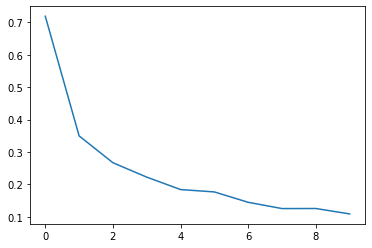

In [37]:
from matplotlib import pyplot as plt
plt.plot(losses)
plt.show()